In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("new_data.csv")

In [174]:
df.columns

Index(['name', 'age', 'position', 'height', 'value', 'national_matches',
       'national_goals', 'matches20', 'goals20', 'assists20', 'yellow20',
       'double_yellows20', 'red20', 'matches21', 'goals21', 'assists21',
       'yellow21', 'double_yellows21', 'red21', 'matches22', 'goals22',
       'assists22', 'yellow22', 'double_yellows22', 'red22'],
      dtype='object')

In [175]:
target = "value"

In [182]:
params = ['age', 'position', 'height', 'national_matches',
       'national_goals', 'matches20', 'goals20', 'assists20', 'yellow20',
       'double_yellows20', 'red20', 'matches21', 'goals21', 'assists21',
       'yellow21', 'double_yellows21', 'red21', 'matches22', 'goals22',
       'assists22', 'yellow22', 'double_yellows22', 'red22']

# Гистограммы  числовых параметров:

In [178]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
plt.rcParams.update(params)


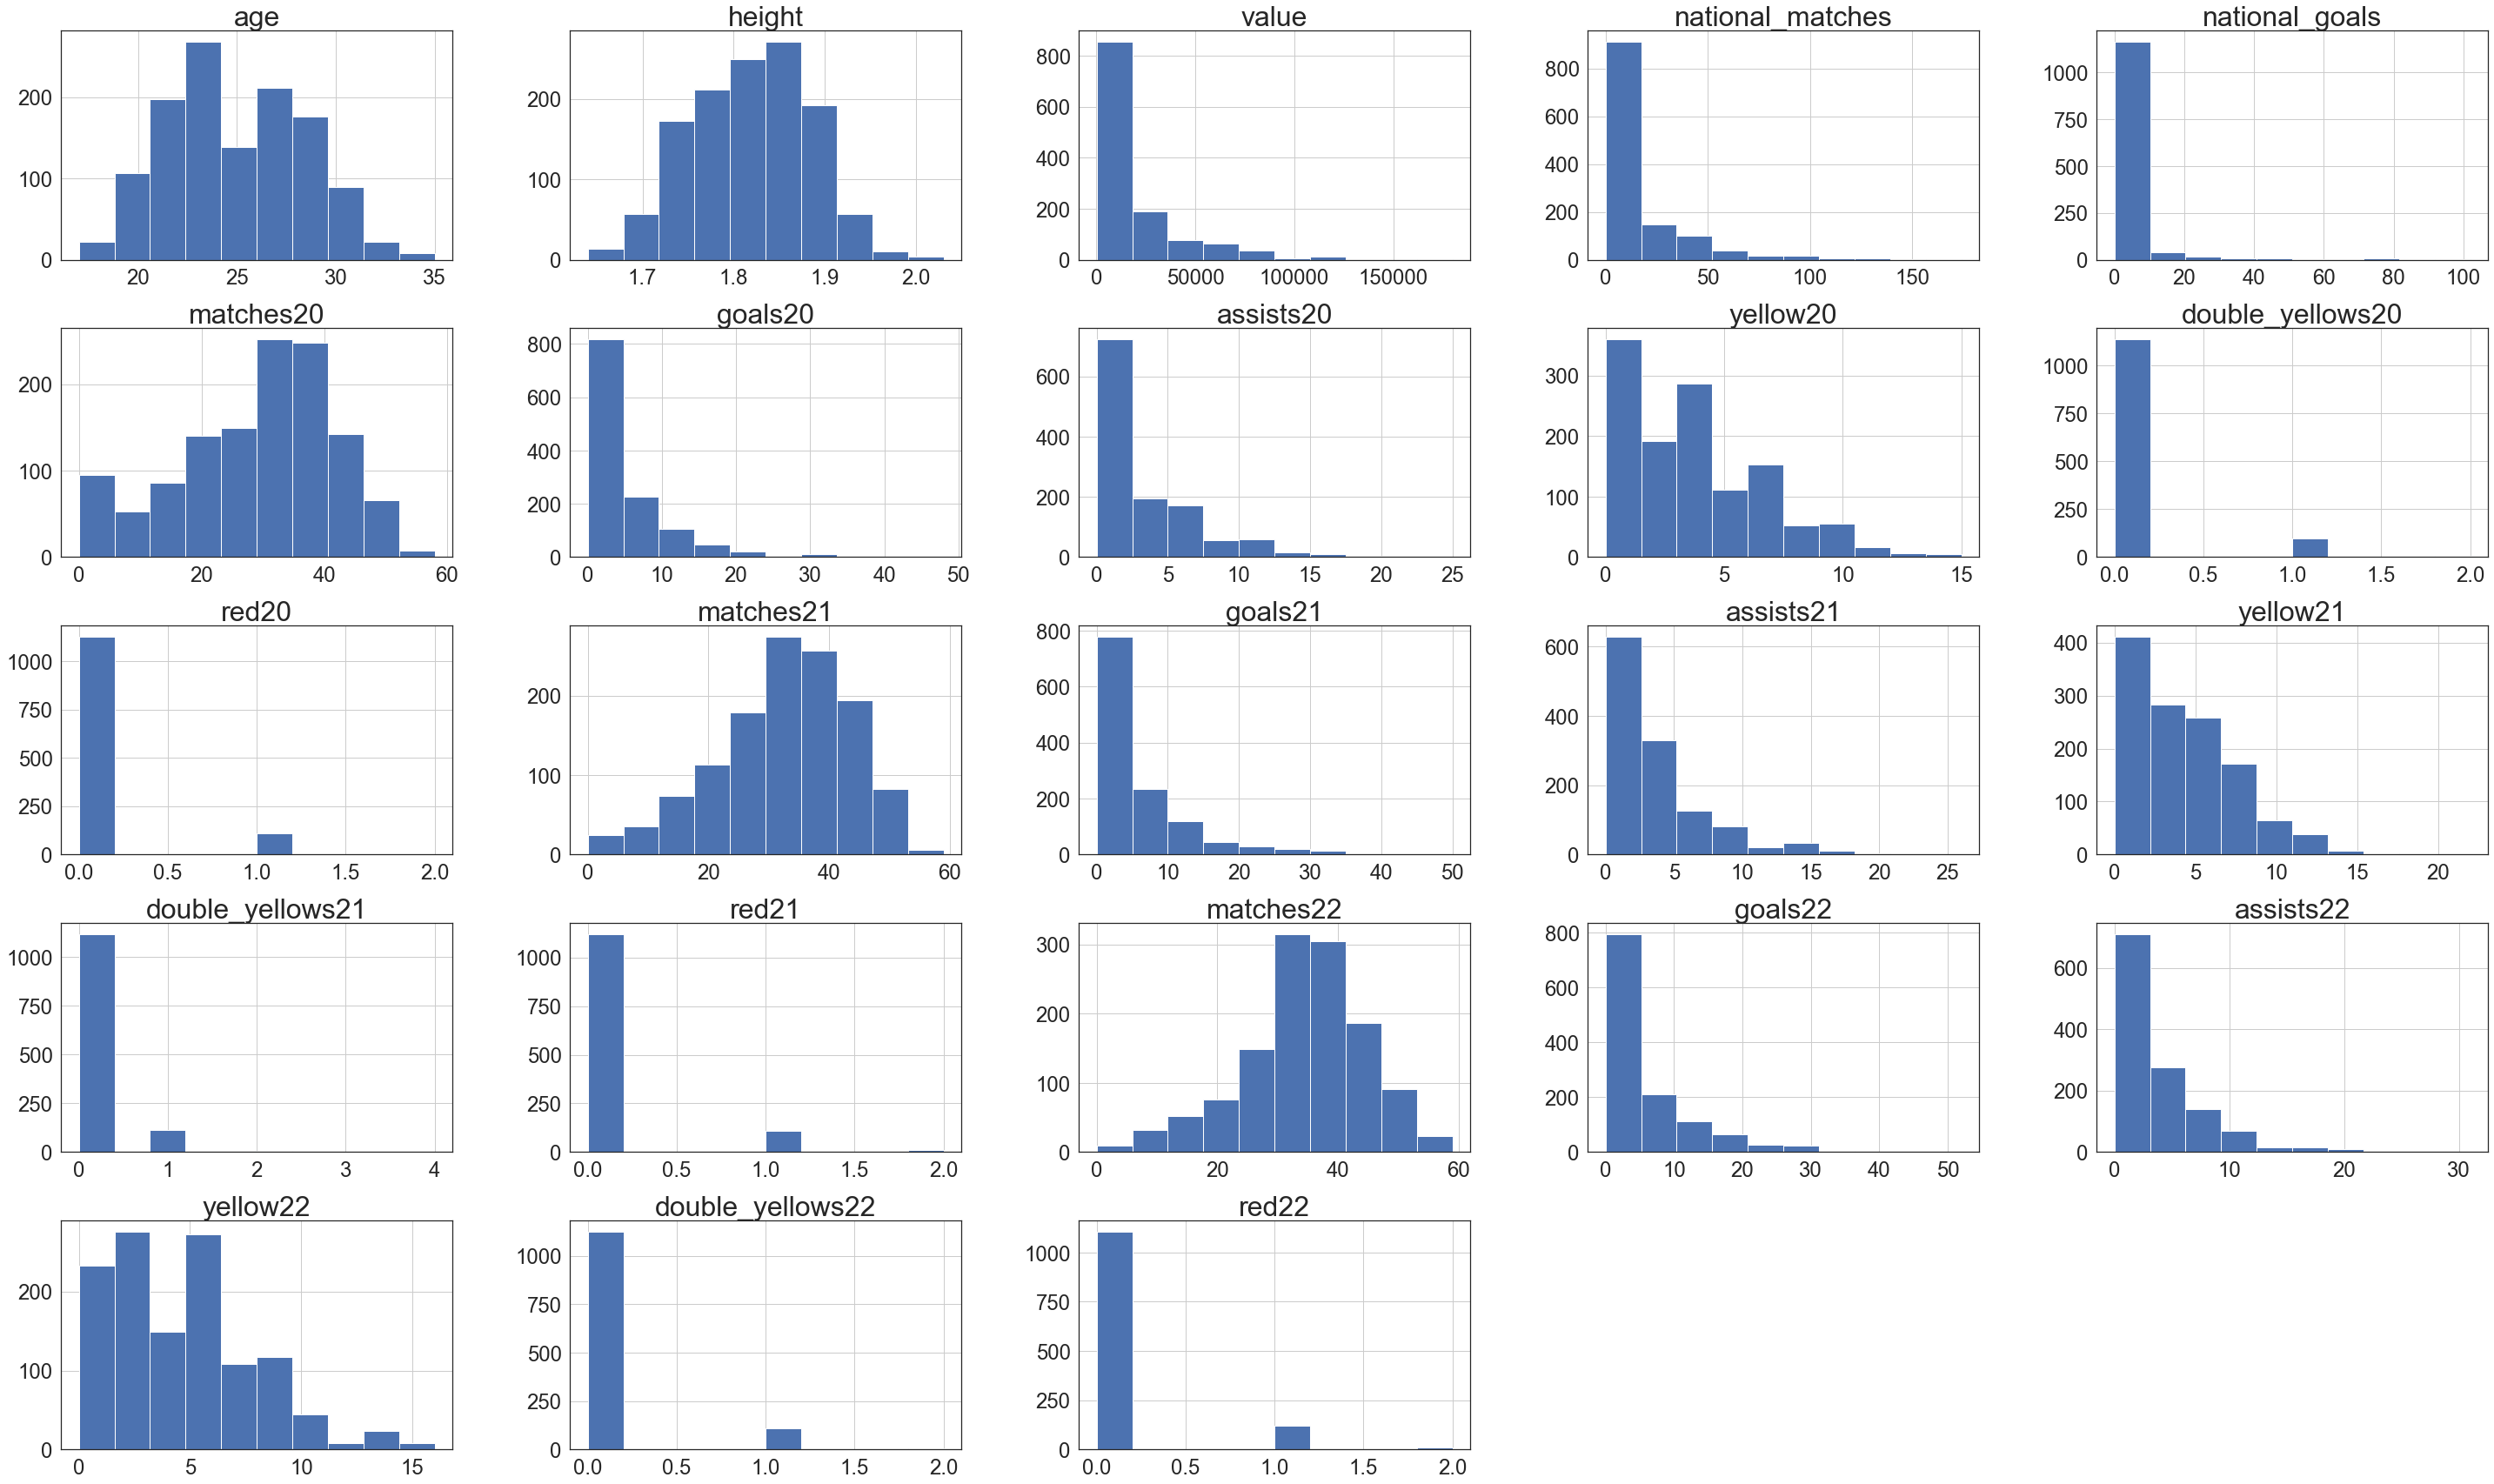

In [179]:
df.hist(figsize=(50, 30));

# Выводы:
Судя по гистограммам, можно предположить, что некоторые параметры имеют слабое влияние на итоговую стоимость игрока, т.к. их значение у большинства футболистов одинаково, частота значения намного больше частот альтернативных значений. Вышеописанные параметры: прямые красные карточки за все обозреваемые года(red), двойные желтые за все обозреваемые года(double_yellows). Это можно обьяснить тем, что получение прямой красной карточки или второй желтой, редкие явления в футбольном мачте, т.к. ведут к удалению игрока с поля, что заметно снижает шансы на успех команды, не позволяют игроку участвовать в следующем матче и зачастую провоцируют санкции со стороны клуба по отношению к футболисту(штраф, отстранение от тренировок и т.д.). Также для неполучения карточек достаточно играть в рамках правил, что доступно для игрока любого уровня(в отличии от высокой голевой результативности и т.д). Поэтому футболисты вне зависимости от стоимости заинтересованы в минимизации количества прямых и непрямых(двойных желтых) красных карточек и у них есть инструмент для достижения этой цели.

# Гистограмма категориальных переменных:

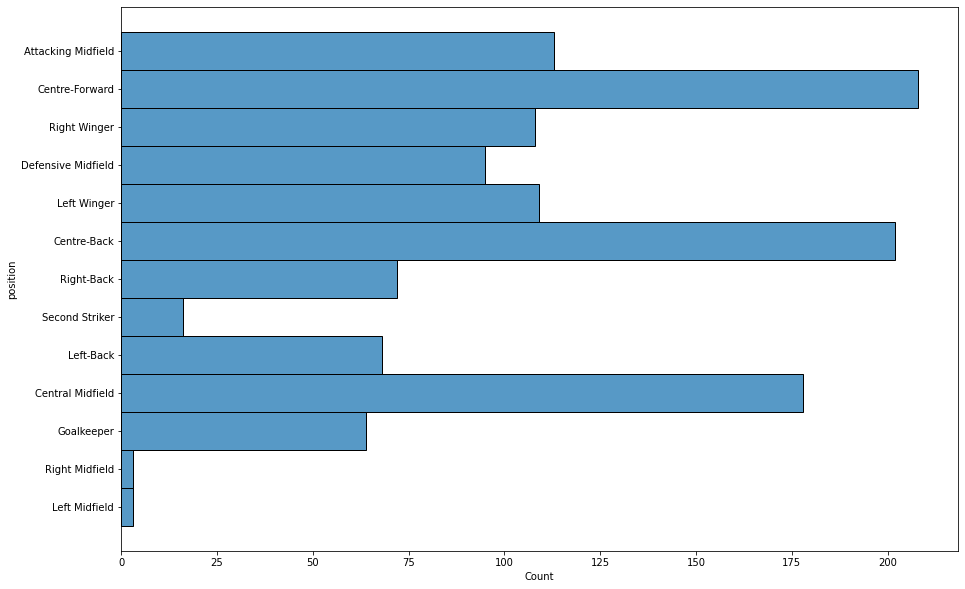

In [9]:
sns.histplot(y="position", data=df);

# Вывод:
Различные позиции представлены в датасете в разных пропорциях. Есть позиции, представителей которых мало в датасете(правый полузащитник, левый полузащитник). Возможно имеет смысл ввести более обобщенные значения позиций. 

# Графики зависимостей:

In [7]:
plt.rcParams['figure.figsize'] = [15, 10] 

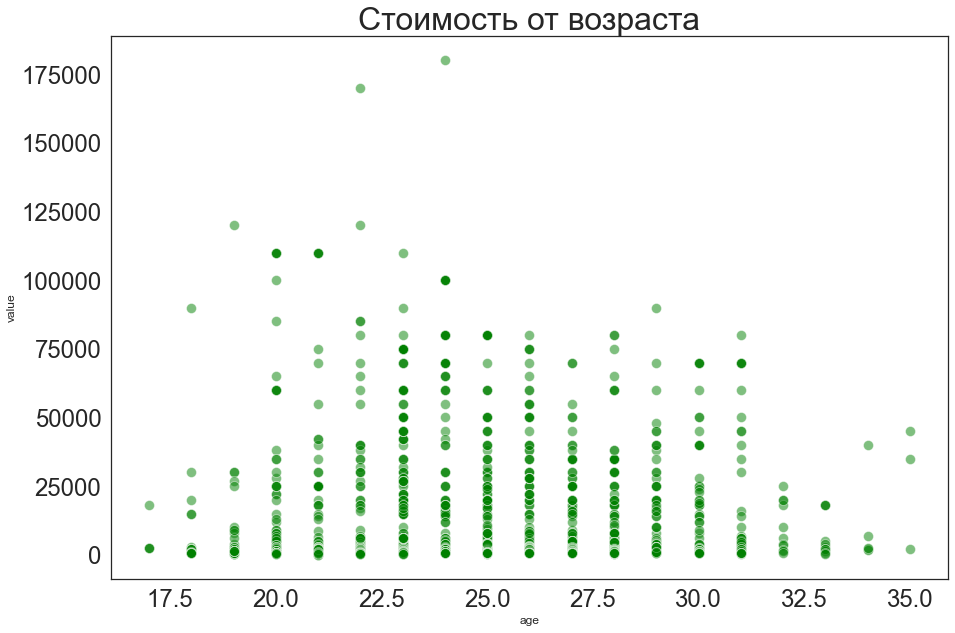

In [186]:
ax_3 = sns.scatterplot(df, x=params[0], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от возраста");

# Вывод:
Судя по графику, можно предположить следующее:с взрослением сначала стоимость футболиста возрастает(примерно от 16 до 20 лет), а затем постепенно падает. Слишком молодой или слишком возрастной(по меркам футбола) игрок стоит заметно меньше своих коллег, находящихся в среднем для футбола возрасте. Что логично, т.к. слишком молодой футболист не обладает достаточным опытом и физической подготовкой для конкуренции на взрослом уровне, также тяжело спрогнозировать перспективы футболиста(т.к. в силу возраста еще непонятна его предрасположенность к травмам/физические возможности), а слишком возрастной футболист проигрывает более молодым из за естественого ухудшения физических показателей  в следствии старения.

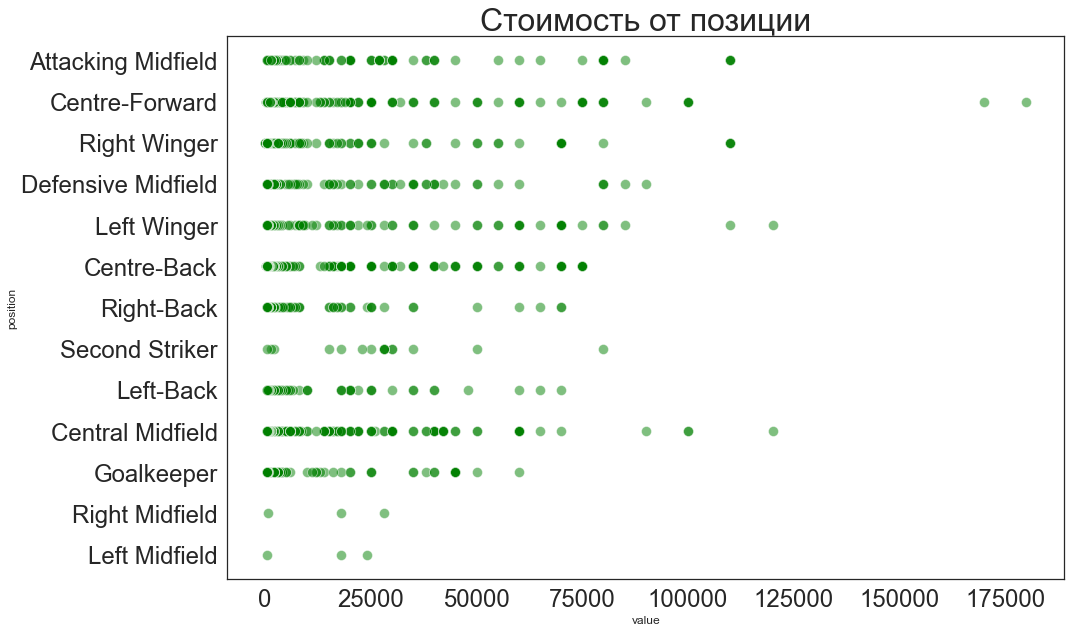

In [187]:
ax_3 = sns.scatterplot(df, x=target, y=params[1], color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от позиции");

# Вывод:
Судя по графику, самыми дорогими футболистами на данный момент являются центральные нападающие, игроки линии защиты(правые/левые/центральные защитники) и голкипер имеют меньший порог  максимальной стоимости чем игроки линии атаки(нападающие/вингеры). Можно предположить, что в среднем игроки нападения стоят дороже остальных. Левые и правые полузащитники не превосходят стоимостью планки в 50000, что является самым низким показателем. Возможно из за непопулярности позиции как у игроков, выбирающих на какой позиции тренироваться/играть, так и у тренеров, которые выбирают схему, по которой будет играть и тренироваться команда.

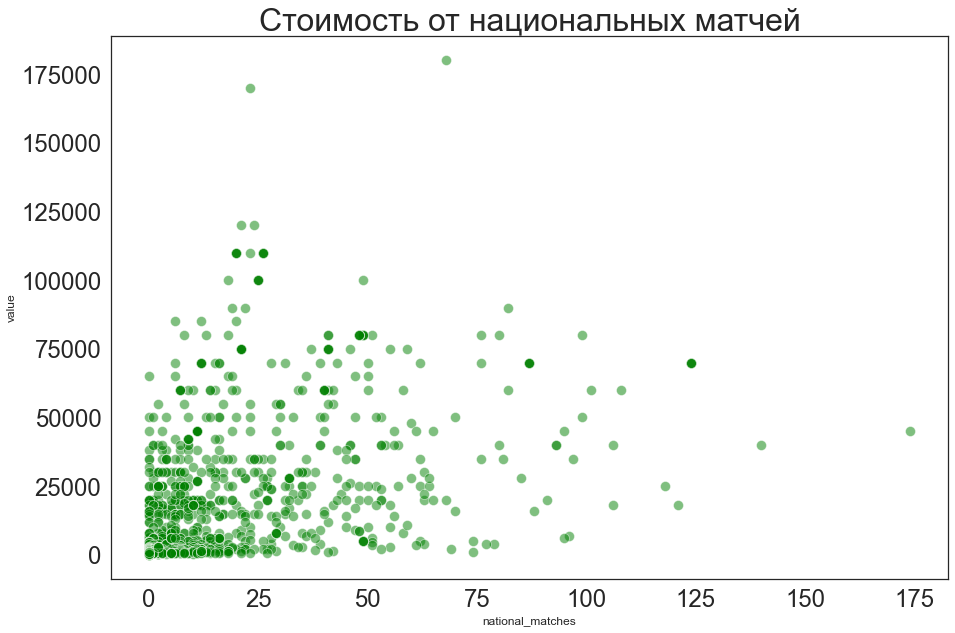

In [188]:
ax_3 = sns.scatterplot(df, x=params[3], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от национальных матчей");

# Вывод:
Нельзя однозначно сказать о зависимости количества матчей в национальной сборной и стоимости. Судя по графику, самые дорогие игроки, сыграли средее количество  матчей в сборной по выборке. Есть множество других игроков, сыгравших больше, но их стоимость меньше. Это может быть из за того, что более возрастной игрок в силу более длинной по времени карьеры  наиграл больше матчей, но по характеристикам на данный момент он уступает молодому, также в более слабые сборные футболистам легче попасть, легче наиграть большее количество матчей с более низким уровнем футбольных навыков. Но можно предположить, что если футболист не сыграл ни одного матча за национальную сборную, его стоимость скорее всего будет ниже чем у сыгравшего 15 и больше матчей.

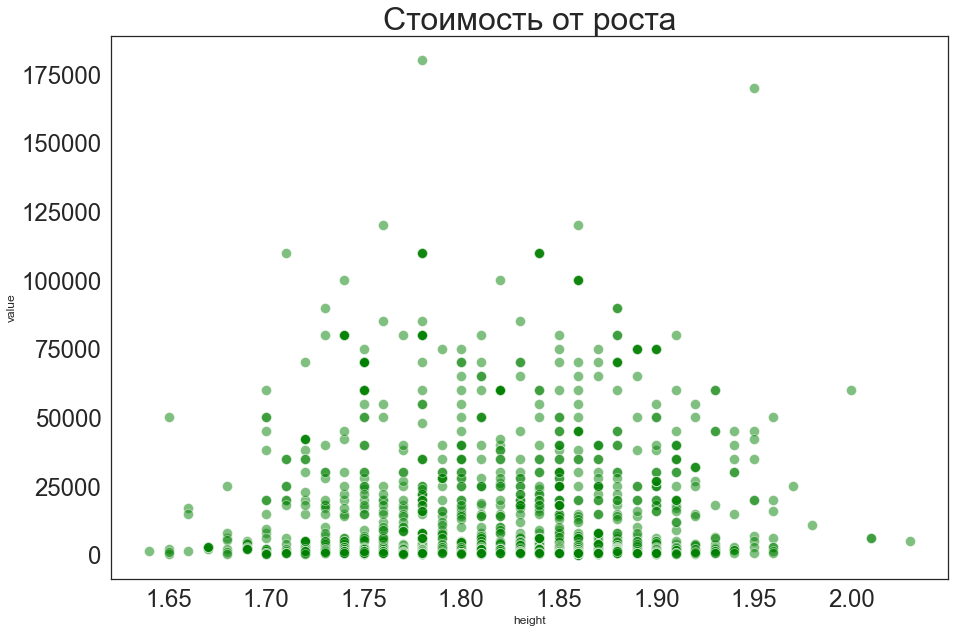

In [189]:
ax_3 = sns.scatterplot(df, x=params[2], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от роста");

# Вывод:
Слишком низкий и слишком высокий футболист скорее всего стоят дешевле средних по росту коллег, что логично, т.к. им сложнее конкурировать в физическом плане(бег, координация). Рост самых дорогих футболистов нходится  в диапозоне от 170 см. до 195 см.

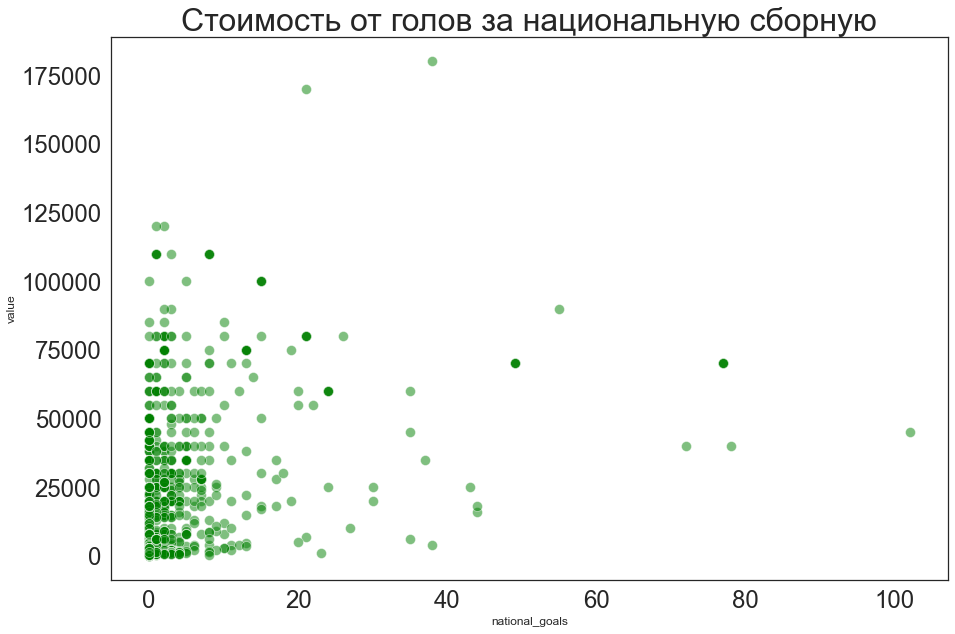

In [190]:
ax_3 = sns.scatterplot(df, x=params[4], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от голов за национальную сборную");

# Вывод:
Судя по графику нельзя однозначно сказать о зависимости голов за национальную сборную и стоимости. Но футболист с 0 голов за национальную сборную скорее всего будет стоить дешевле чем футболист с большим количеством. 

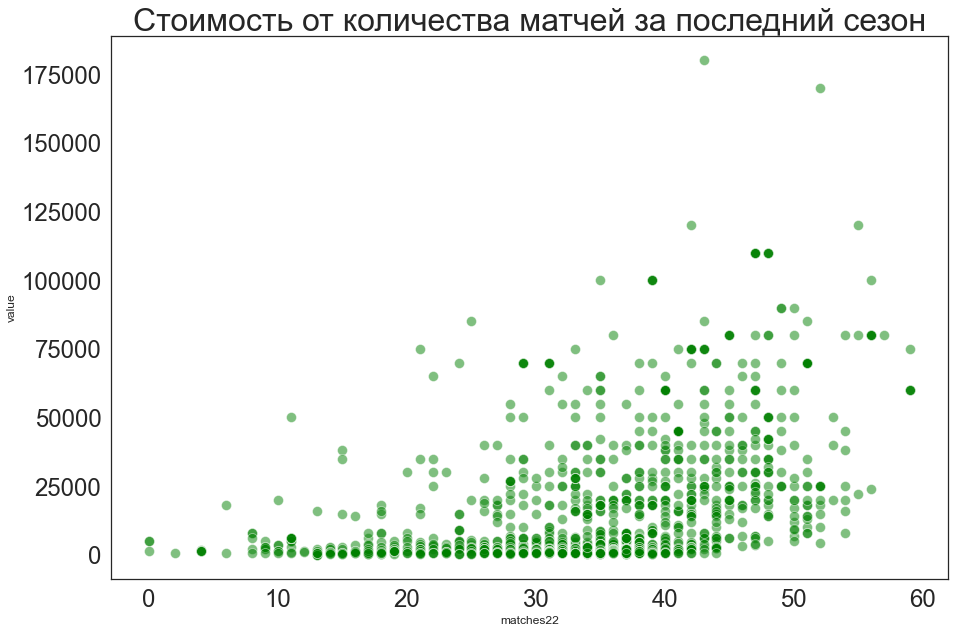

In [191]:
ax_3 = sns.scatterplot(df, x=params[17], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от количества матчей за последний сезон");

# Вывод:
Судя по графику, игрок, который сыграл больше матчей в последнем сезоне, скорее всего стоит больше. Т.е. между данными прослеживается положителльная зависимость. Что логично, ведь тренер формирует состав из игроков, на данный момент являющихся лучшими, т.к. они с большей вероятностью принесут победу. Преобладание для почти всех значений количества матчей игроков с низкой стоимостью может являться следствием формирования выборки на основе низших дивизионов, где количество матчей не сильно влияет на стоимость, т.к. уровень футбола в таких лигах в принципе низок. 

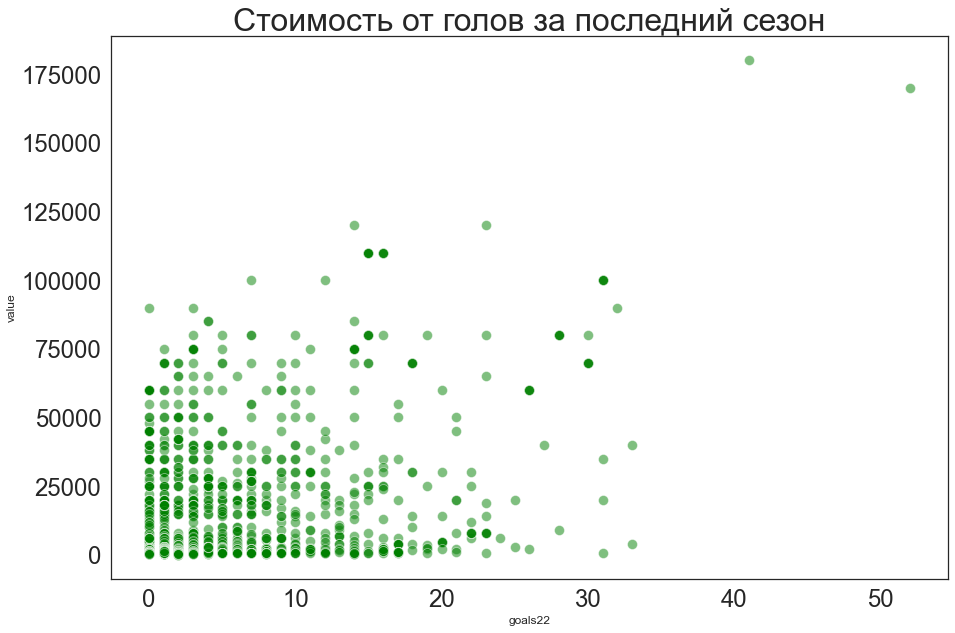

In [192]:
ax_3 = sns.scatterplot(df, x=params[18], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от голов за последний сезон");

# Вывод:
Судя по графику, можно говорить о положительной зависимости величин. Т.е. игрок забивающий больше, стоит больше. Зависимость, предположительно, не сильная, т.к. забивать голы основной показатель игроков линии нападения, игроки других линий могут быть сверх полезными для команды и без высокой голевой результативности.

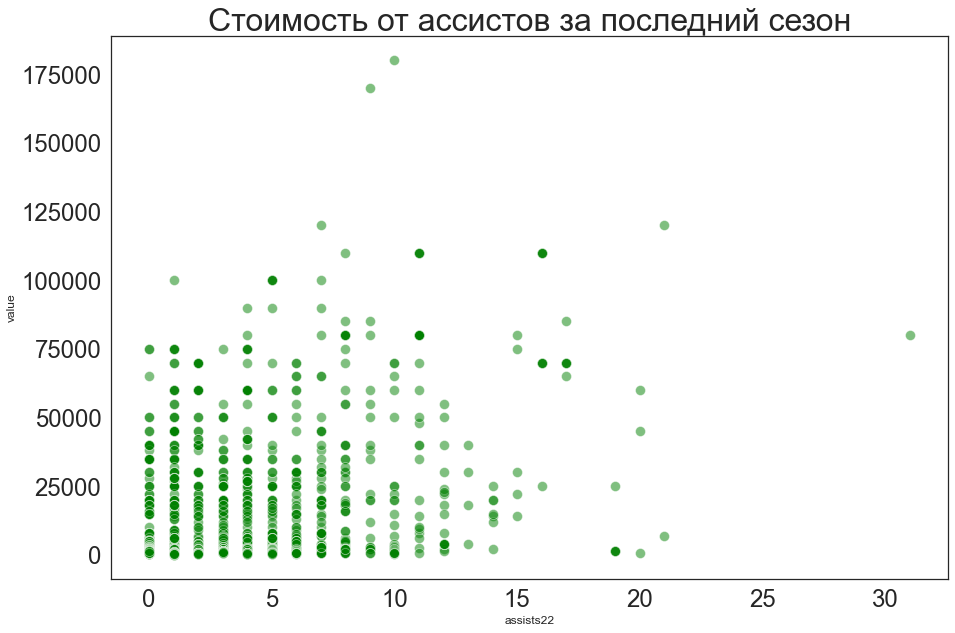

In [193]:
ax_3 = sns.scatterplot(df, x=params[19], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от ассистов за последний сезон");

# Вывод:
Судя по графику, можно говорить о положительной зависимости величин. Т.е. игрок отдающий больше ассистов, стоит больше. Зависимость, предположительно, не сильная, т.к. ассисты основной показатель игроков средей линии, игроки других линий могут быть сверх полезными для команды и без большого количества ассистов.

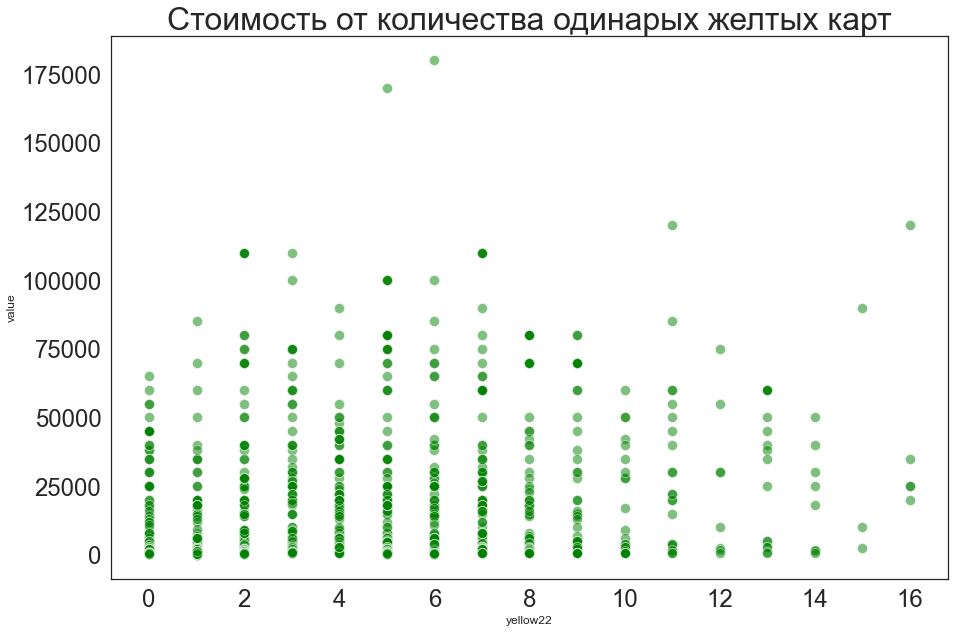

In [194]:
ax_3 = sns.scatterplot(df, x=params[20], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от количества одинарых желтых карт");

# Вывод:
На первый взгляд никакой зависимости между величинами не наблюдается. Возможно это связано с тем, что получение футболистом одной желтой карточки не сильно влияет на игру игрока и всей команды в целом, т.к. просто вынуждает его играть менее грубо.

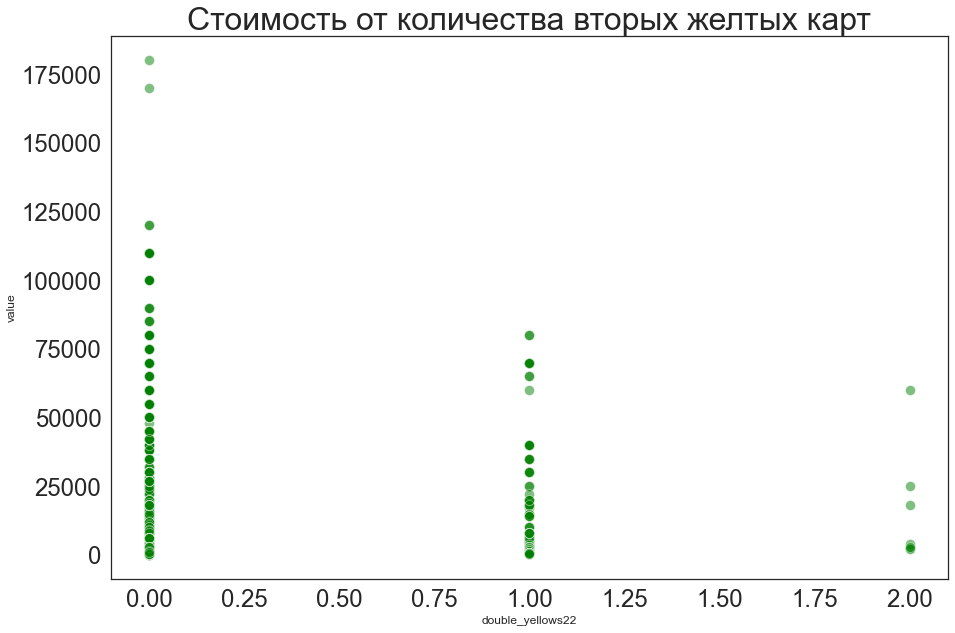

In [195]:
ax_3 = sns.scatterplot(df, x=params[21], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от количества вторых желтых карт");

# Вывод:
Судя по графику,можно предположить, что футболисты, получающие больше вторых желтых карточек, стоят дешевле. Это можно обьяснить нежеланием видеть у себя в команде игрока, который может быть удален и тем самым может разрушить командную игру и снизить шансы на победу.

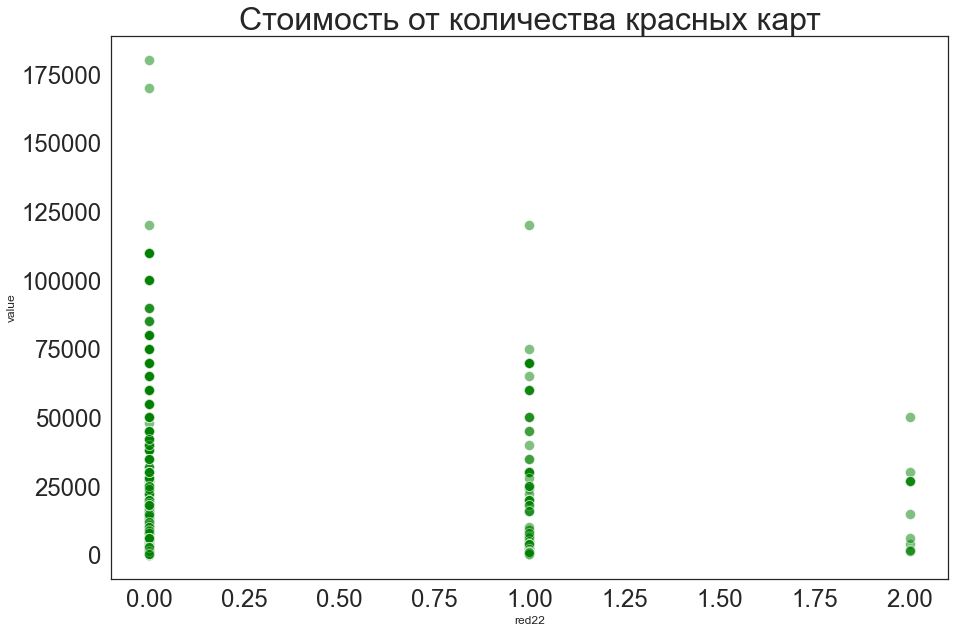

In [196]:
ax_3 = sns.scatterplot(df, x=params[22], y=target, color="green", s=100, alpha=0.5)
ax_3.set(title="Стоимость от количества красных карт");

# Вывод:
Судя по графику,можно предположить, что футболисты, получающие больше красных карточек, стоят дешевле. Это можно обьяснить нежеланием видеть у себя в команде игрока, который может быть удален и тем самым может разрушить командную игру и снизить шансы на победу.